# Kaggle 신용카드 사기 검출(Fraud_Detection) 
# Keras Modeling - Binary

[https://www.kaggle.com/mlg-ulb/creditcardfraud](https://www.kaggle.com/mlg-ulb/creditcardfraud)

## Credit Card Fraud Detection

- creditcard.csv (284,807 * 31)
- Class : 0 (정상), 1(사기)
- 사기 검출(Fraud Detection), 이상 탐지(Anomaly Detection)



# Ⅰ. Goolge Drive Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- 마운트 결과 확인

In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'

-rw------- 1 root root 69155672 Mar  4 04:46 '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'


# Ⅱ. Data Preprocessing



> ## 1) Unzip 'creditCardFraud.zip'

- Colab 파일 시스템에 'creditcard.csv'파일 생성

In [ ]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/creditCardFraud.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip
  inflating: creditcard.csv          


- creditcard.csv 파일 확인

In [ ]:
!ls -l

total 147304
-rw-r--r-- 1 root root 150828752 Sep 20  2019 creditcard.csv
drwx------ 6 root root      4096 Mar 18 04:09 drive
drwxr-xr-x 1 root root      4096 Mar  5 14:37 sample_data


> ## 2) 데이터 읽어오기

- pandas DataFrame

In [ ]:
%%time
import pandas as pd
df = pd.read_csv('creditcard.csv')
df.info()
# V1 ~ V28 : 카드 사용자의 정보 (Standardization 된 상태)
# Amount : 신용카드 결제금액
# Class (y) : 분류, 0 = 정상, 1 = 사기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- 0 (정상) Class와 1 (사기) Class 개수

In [ ]:
df.Class.value_counts()
# 부정에 대해 알아야 한다. 1 = positive

0    284315
1       492
Name: Class, dtype: int64

- 0 (정상) Class와 1 (사기) Class 비율

In [ ]:
(df.Class.value_counts() / df.shape[0]) * 100
# df.shape[0] = 행 개수

0    99.827251
1     0.172749
Name: Class, dtype: float64

> ## 3) Time 열(Column) 삭제

In [ ]:
df.drop('Time', axis = 1, inplace = True)
df.head(1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.5516,-0.617801,-0.99139,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


> ## 4) DataFrame to Array & Casting



In [ ]:
df_ar = df.values
df_ar

array([[-1.35980713e+00, -7.27811733e-02,  2.53634674e+00, ...,
        -2.10530535e-02,  1.49620000e+02,  0.00000000e+00],
       [ 1.19185711e+00,  2.66150712e-01,  1.66480113e-01, ...,
         1.47241692e-02,  2.69000000e+00,  0.00000000e+00],
       [-1.35835406e+00, -1.34016307e+00,  1.77320934e+00, ...,
        -5.97518406e-02,  3.78660000e+02,  0.00000000e+00],
       ...,
       [ 1.91956501e+00, -3.01253846e-01, -3.24963981e+00, ...,
        -2.65608286e-02,  6.78800000e+01,  0.00000000e+00],
       [-2.40440050e-01,  5.30482513e-01,  7.02510230e-01, ...,
         1.04532821e-01,  1.00000000e+01,  0.00000000e+00],
       [-5.33412522e-01, -1.89733337e-01,  7.03337367e-01, ...,
         1.36489143e-02,  2.17000000e+02,  0.00000000e+00]])

- object to float
- X, y 지정

In [ ]:
ar_X = df_ar[:, :-1].astype(float) # Class를 제외한 모든 변수
ar_y = df_ar[:,-1]                 # Class 변수

ar_X.shape, ar_y.shape

((284807, 29), (284807,))

In [ ]:
print(ar_X)
print(ar_y)

[[-1.35980713e+00 -7.27811733e-02  2.53634674e+00 ...  1.33558377e-01
  -2.10530535e-02  1.49620000e+02]
 [ 1.19185711e+00  2.66150712e-01  1.66480113e-01 ... -8.98309914e-03
   1.47241692e-02  2.69000000e+00]
 [-1.35835406e+00 -1.34016307e+00  1.77320934e+00 ... -5.53527940e-02
  -5.97518406e-02  3.78660000e+02]
 ...
 [ 1.91956501e+00 -3.01253846e-01 -3.24963981e+00 ...  4.45477214e-03
  -2.65608286e-02  6.78800000e+01]
 [-2.40440050e-01  5.30482513e-01  7.02510230e-01 ...  1.08820735e-01
   1.04532821e-01  1.00000000e+01]
 [-5.33412522e-01 -1.89733337e-01  7.03337367e-01 ... -2.41530880e-03
   1.36489143e-02  2.17000000e+02]]
[0. 0. 0. ... 0. 0. 0.]


> ## 5) One Hot Encoding with sklearn & Keras

-  One Hot Encoding - to_categorical( )

In [ ]:
import tensorflow as tf
ar_yOHE = tf.keras.utils.to_categorical(ar_y)
ar_yOHE

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

> ## 6) Train & Test Split with sklearn Package

- 7 : 3

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ar_X, ar_yOHE,
                                                    test_size = 0.3,
                                                    random_state = 2045)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((199364, 29), (85443, 29), (199364, 2), (85443, 2))

# Ⅲ. Keras Modeling



> ## 1) Keras models & layers Import

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

> ## 2) Model Define

- 모델 신경망 구조 정의
   - activation_function : relu, sigmoid, softmax 하나씩 사용
   - 노드 개수 16, 8, 2개로 설정
   - Hidden_layer(은닉층) : 2개로 설정

In [ ]:
model_df = models.Sequential() # Sequential 모델은 순차적으로 레이어를 더하기 때문에 순차모델이라고도 한다

model_df.add(layers.Dense(16, activation = 'relu', input_shape = (29,))) # input_shape = X의 개수
model_df.add(layers.Dense(8, activation = 'sigmoid'))
model_df.add(layers.Dense(2, activation = 'softmax'))
# Dense 클래스로 만들어진 노드를 sequential 모델에 add하면 모델 안에 있는 다른 노드들과 연결된다

- 모델 구조 확인
   - Layers & Parameters

In [ ]:
model_df.summary()
# 각각 레이어의 파라미터 개수(이전 입력노드개수 * 입력노드개수만큼의 가중치 + 입력노드개수만큼의 편향)가 480(29 * 16 + 16), 136(16 * 8 + 8), 18(8 * 2 + 2)개다.
# Input_layer = summary에 나오진 않았지만, V1,...,amount로 29개이다.  
# Hidden_layer1 = 노드 16개 
# Hidden_layer2 = 노드 8개 
# Output_layer  = 노드 3개(1,0 / 0,1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 18        
Total params: 634
Trainable params: 634
Non-trainable params: 0
_________________________________________________________________


- 모델 레이어 시각화

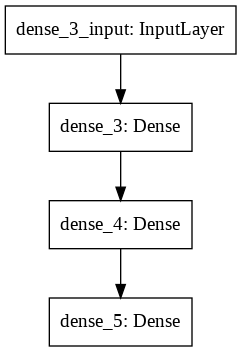

In [ ]:
from tensorflow.keras import utils
utils.plot_model(model_df)

> ## 3) Model Compile

- 모델 학습방법 설정
   - 'adam' = Adaptive Moment Estimation
      - RMSProp과 Momentum 방식의 장점을 합친 알고리즘
      - Momentum과 같이 지금까지 계산해온 기울기의 지수평균을 저장
      - RMSProp과 같이 기울기 제곱값의 지수평균을 저장

   - momentum, SGD, Adaptive Gradient로 바꿔서 실행도 가능

In [ ]:
model_df.compile(loss = 'binary_crossentropy',
                   optimizer = 'adam',
                   metrics = ['Recall'])
# adam 방법으로 CEE를 최소화 시키고, Recall 보겠다.
# 이진분류를 하고 싶으면, loss = 'binary_crossentropy'
# 예측모델을 만들고 싶으면, loss = 'mean_squared_error'

> ## 4) Model Fit

- 모델 학습 수행

In [ ]:
%%time
history_df = model_df.fit(X_train, y_train,
                              epochs = 50,
                              batch_size = 1024,
                              validation_data = (X_test, y_test))
## 코드 설명 ## 
# X_train = 입력값
# y_train = 입력 값들이 실제 출력되기를 바라는 값
# batch_size = 샘플 개수
# epochs = 학습 크기. 1024묶음씩 50번 학습시킨다
# train data에 199364개의 데이터를 1024개씩 묶으면, train data 한번에 총 195번을 돌릴 수 있고, epochs = 50이니, 195번 돌린 것을 50번 반복한다. 

## 결과 ##
# loss, accuracy : train data로 학습시킨 결과 
# val_loss, val_accuracy : test data로 학습시킨 결과

Epoch 1/50
195/195 [==============================] - 1s 3ms/step - loss: 0.0029 - recall: 0.9995 - val_loss: 0.0031 - val_recall: 0.9995
Epoch 2/50
195/195 [==============================] - 1s 3ms/step - loss: 0.0029 - recall: 0.9995 - val_loss: 0.0032 - val_recall: 0.9995
Epoch 3/50
195/195 [==============================] - 1s 3ms/step - loss: 0.0028 - recall: 0.9995 - val_loss: 0.0032 - val_recall: 0.9995
Epoch 4/50
195/195 [==============================] - 1s 3ms/step - loss: 0.0028 - recall: 0.9995 - val_loss: 0.0032 - val_recall: 0.9995
Epoch 5/50
195/195 [==============================] - 1s 3ms/step - loss: 0.0028 - recall: 0.9995 - val_loss: 0.0031 - val_recall: 0.9995
Epoch 6/50
195/195 [==============================] - 1s 3ms/step - loss: 0.0029 - recall: 0.9995 - val_loss: 0.0031 - val_recall: 0.9995
Epoch 7/50
195/195 [==============================] - 1s 3ms/step - loss: 0.0028 - recall: 0.9995 - val_loss: 0.0032 - val_recall: 0.9995
Epoch 8/50
195/195 [==============

> ## 5) 학습 결과 시각화

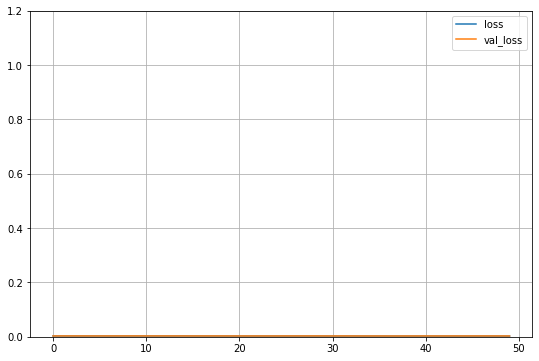

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))
plt.ylim(0, 1.2)
plt.plot(history_df.history['loss'])
plt.plot(history_df.history['val_loss'])
plt.plot(history_df.history['recall'])
plt.plot(history_df.history['val_recall'])
plt.legend(['loss','val_loss', 'recall', 'val_recall'])
plt.grid()
plt.show()
# 보통 train data, tets data 결과를 따로 그린다
# accuracy는 처음부터 1에 가깝고,
# loss는 0에 가깝다.
# 다른 activation function이나 mertic을 봐도 그럴까?

> ## 6) Model Evaluate

- Loss & Accuracy

In [ ]:
loss, recall = model_df.evaluate(X_test, y_test)

print('Loss = {:.2f}'.format(loss))
print('Recall = {:.2f}'.format(recall))

2671/2671 [==============================] - 3s 995us/step - loss: 0.0031 - recall: 0.9995
Loss = 0.00
Recall = 1.00


> ## 7) Model Predict

- Probability : 확률값

In [ ]:
import numpy as np
np.set_printoptions(suppress = True, precision = 5)
model_df.predict(X_test)
# 한 행 결과 합 = 1
# 간혹 한 행씩 [0.00332, 0.99668]이렇게 분류되긴 하지만, 대부분이 .0으로 떨어지게 확실히 분류됐다. 

Output hidden; open in https://colab.research.google.com to view.

- Class

In [ ]:
# 전체 array 출력
import sys
np.set_printoptions(threshold = sys.maxsize) 

In [ ]:
y_hat = model_df.predict_classes(X_test)
y_hat
# 위의 결과를 0, 1로 분류. 확률값이 가장 큰 값으로 분류한다
# 0 = [1, 0]
# 1 = [0, 1]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

- One-Hot Encoding to Array
   - np.argmax( ) : 다차원 배열의 차원에 따라 가장 큰 값의 인덱스를 반환
   - axis = 1 : 열기준

In [ ]:
y = np.argmax(y_test, axis = 1)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

- Confusion Matrix & Classification Report

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y, y_hat)
# 0은 20개, 1은 25개나 잘못 분류됐다. 

array([[85279,    20],
       [   25,   119]])

In [ ]:
print(classification_report(y, y_hat,
                            target_names = ['normal',
                                            'fraud']))
# recall = 0.83으로 나왔다.

              precision    recall  f1-score   support

      normal       1.00      1.00      1.00     85299
       fraud       0.86      0.83      0.84       144

    accuracy                           1.00     85443
   macro avg       0.93      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(y, y_hat))
print(precision_score(y, y_hat, pos_label = 1))
print(recall_score(y, y_hat, pos_label = 1))

0.9994733330992591
0.8561151079136691
0.8263888888888888
